In [3]:
import time
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By

import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [12]:
import pandas as pd
df = pd.read_csv("Data_Crypto2.csv")
df['Volume(24h)'].fillna(100, inplace=True)
df

,Symbol,Market Cap,Price,Circulating Supply,Volume(24h),% 1h,% 24h,% 7d
0,BTC,8.927062e+11,47255.660000,1.889099e+07,6.279050e+10,-0.0014,-0.1773,-0.1428
1,ETH,4.683605e+11,3949.010000,1.186021e+08,4.145664e+10,0.0027,-0.1501,-0.0499
2,BNB,9.142174e+10,548.090000,1.668012e+08,4.576646e+09,0.0021,-0.1238,-0.1013
3,USDT,7.417190e+10,1.000000,7.415765e+10,1.442001e+11,-0.0001,-0.0009,-0.0007
4,SOL,5.879423e+10,192.360000,3.056412e+08,6.513758e+09,0.0001,-0.1955,-0.0336
...,...,...,...,...,...,...,...,...
995,PING,1.407218e+07,0.005205,2.703465e+09,5.515740e+05,-0.0063,-0.1630,-0.2510
996,BIN,1.404463e+07,0.017560,8.000000e+08,1.962260e+06,0.0132,-0.2527,-0.2191
997,FEAR,1.399061e+07,2.140000,6.532157e+06,1.343316e+07,-0.0054,-0.2222,0.0025
998,AGRS,1.398430e+07,0.776900,1.800000e+07,5.813000e+03,0.0371,-0.0830,0.0620


In [37]:
#Without logging the features and target - Analysis
x = df.drop(columns = ['Price', 'Symbol'])
x = sm.add_constant(x)
y = df['Price']
#z = df[['Circulating Supply', '% 1h']]

model = sm.OLS(y, x, data = df)
crypto_model_non_log = model.fit()
crypto_model_non_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     21.37
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           6.32e-17
Time:                        17:05:23   Log-Likelihood:                -9871.4
No. Observations:                1000   AIC:                         1.975e+04
Df Residuals:                     995   BIC:                         1.978e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                433.2639    173.327      2.500      0.013      93.136     773.392
Market Cap          4.545e-08   5.42e-09      8.388      0.000    3.48e-08    5.61e-08
Circulating Supply -3.861e-13    1.6e-12     -0.241      0.809   -3.52e-12    2.75e-12
Volume(24h)        -3.769e-08   3.37e-08     -1.118      0.264   -1.04e-07    2.85e-08
% 1h                   1.6172      4.665      0.347      0.729      -7.536      10.771
% 24h                -39.8602     91.834     -0.434      0.664    -220.070     140.349
% 7d                 133.3596    531.919      0.251      0.802    -910.452    1177.171
==============================================================================
Omnibus:                     1831.252   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1539825.510
Skew:                          12.800   Prob(JB):                         0.00
Kurtosis:                     193.527   Cond. No.                     4.32e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.32e+15. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

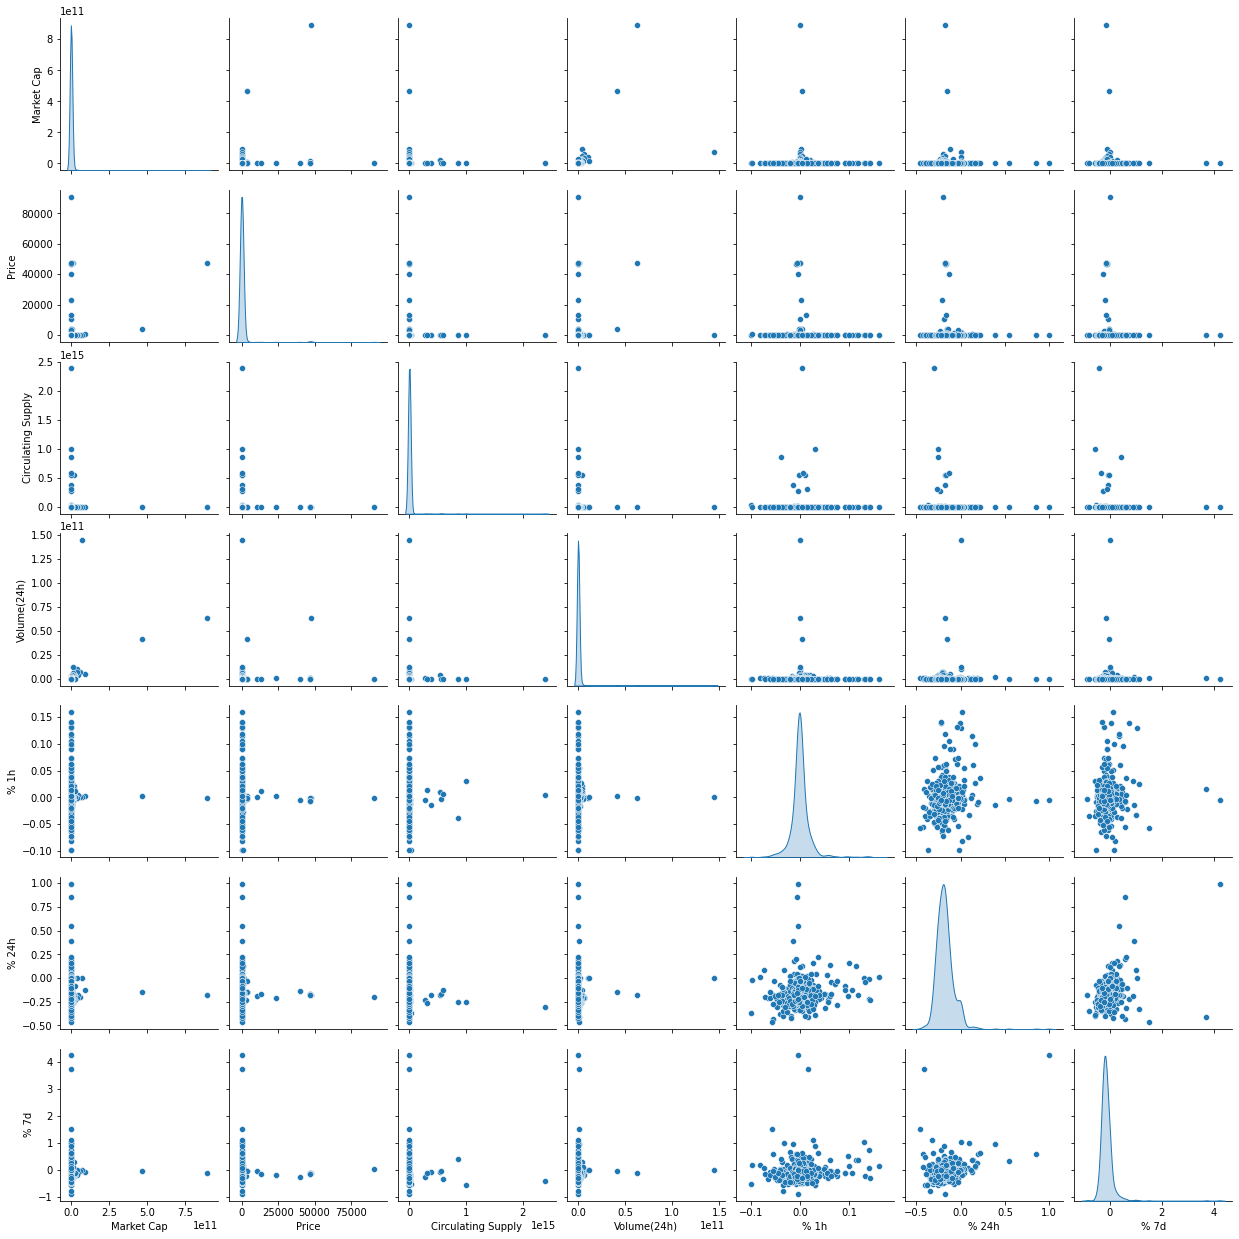

In [15]:
sns.pairplot(df, diag_kind='kde')

<AxesSubplot:ylabel='cooks_d'>

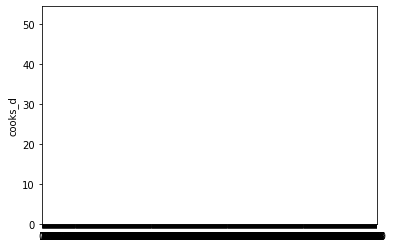

In [38]:
#Test - Checking Cook'D for Outliers without log

influence = crypto_model_non_log.get_influence()
influence_frame = influence.summary_frame().reset_index()

sns.barplot(y = 'cooks_d',
            x = influence_frame.index,
           data = influence_frame)

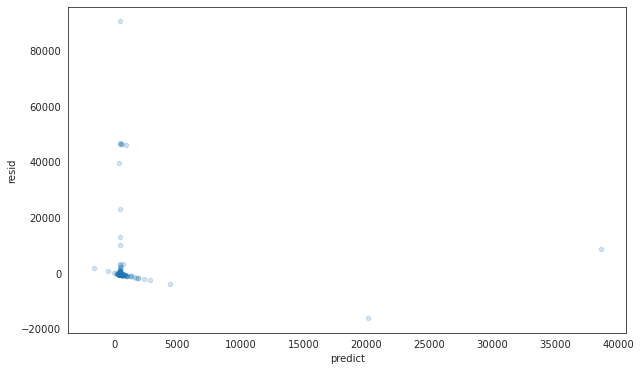

In [39]:
#Test - Non-normality without log
df['predict']= crypto_model_non_log.predict(x)
df['resid'] = df['Price']-df['predict']
with sns.axes_style('white'):
    plot=df.plot(kind='scatter',
                    x='predict', y = 'resid', alpha = 0.2, figsize=(10,6))

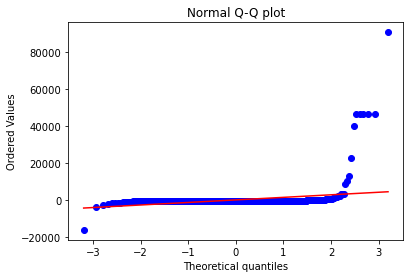

In [40]:
from scipy import stats
import matplotlib.pyplot as plt
stats.probplot(df['resid'], dist = 'norm', plot = plt)
plt.title('Normal Q-Q plot')
plt.show()

In [ ]:
#Taking Log transformation on the first four variables, drop marketcap

In [ ]:
df_log = df.apply(lambda x: np.log(x) if x.name in ["Price", "Market Cap", 'Circulating Supply', 'Volume(24h)'] else x)

df_log = df_log.drop('Market Cap', axis = 1)
df_log

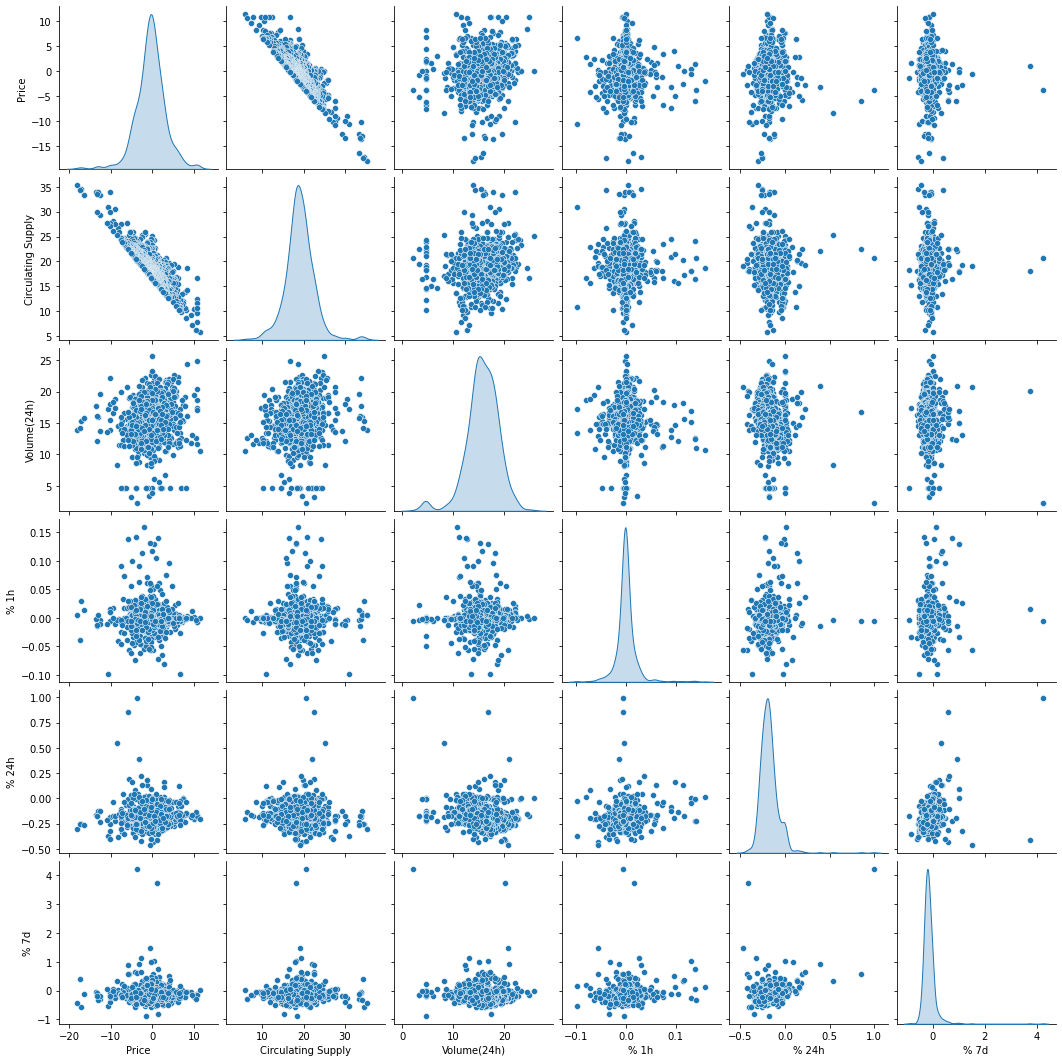

In [18]:
sns.pairplot(df_log, diag_kind='kde')

In [24]:
#Fitting with log in the features and target
x = df_log.drop(columns = ['Price', 'Symbol'])
x = sm.add_constant(x)
y = df_log['Price']

model = sm.OLS(y, x, data = df_log)
crypto_model = model.fit()
crypto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1308.
Date:                Wed, 08 Dec 2021   Prob (F-statistic):               0.00
Time:                        16:38:26   Log-Likelihood:                -1675.3
No. Observations:                1000   AIC:                             3363.
Df Residuals:                     994   BIC:                             3392.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 12.3643      0.282     43.814      0.000      11.811      12.918
Circulating Supply    -0.9560      0.012    -79.772      0.000      -0.980      -0.932
Volume(24h)            0.3516      0.014     25.526      0.000       0.325       0.379
% 1h                  -0.3919      1.901     -0.206      0.837      -4.123       3.339
% 24h                  0.8437      0.449      1.881      0.060      -0.037       1.724
% 7d                   0.0701      0.169      0.414      0.679      -0.262       0.402
==============================================================================
Omnibus:                      138.999   Durbin-Watson:                   0.821
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.316
Skew:                           0.908   Prob(JB):                     2.64e-50
Kurtosis:                       4.477   Cond. No.                     1.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:ylabel='cooks_d'>

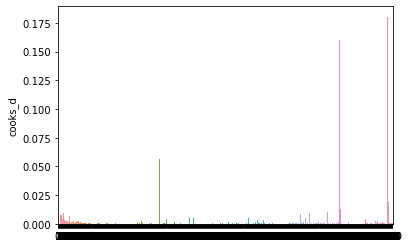

In [25]:
#Test - Checking Cook'D for Outliers

influence = crypto_model.get_influence()
influence_frame = influence.summary_frame().reset_index()

sns.barplot(y = 'cooks_d',
            x = influence_frame.index,
           data = influence_frame)

In [26]:
max_index = influence_frame['cooks_d'].idxmax()
df_log.iloc[max_index]
#outliers seems to be okay

Symbol                      TOP
Price                 -5.944963
Circulating Supply    22.430269
Volume(24h)            16.76292
% 1h                    -0.0062
% 24h                     0.857
% 7d                     0.5736
Name: 984, dtype: object

In [27]:
#Test - check vif for collinarity
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = df_log.drop(columns = ['Price', 'Symbol'])
x = sm.add_constant(x)
y = df_log['Price']


model = sm.OLS(y, x, data = df_log)
crypto_model = model.fit()
crypto_model.summary()

vif = pd.DataFrame()
vif['variables'] = x.columns
vif['vif'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif

#collinarity is okay

,variables,vif
0,const,47.408638
1,Circulating Supply,1.034916
2,Volume(24h),1.120251
3,% 1h,1.022078
4,% 24h,1.357747
5,% 7d,1.252199


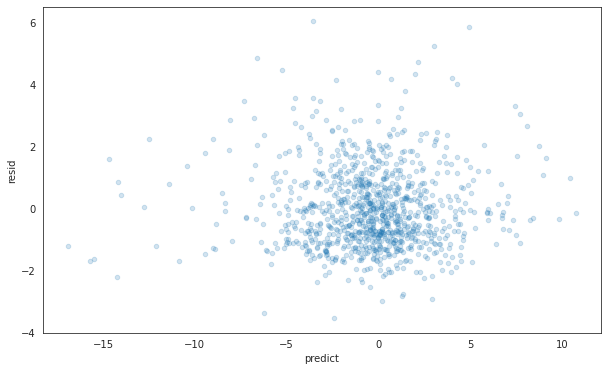

In [28]:
#Test - Non-normality
df_log['predict']= crypto_model.predict(x)
df_log['resid'] = df_log['Price']-df_log['predict']
with sns.axes_style('white'):
    plot=df_log.plot(kind='scatter',
                    x='predict', y = 'resid', alpha = 0.2, figsize=(10,6))

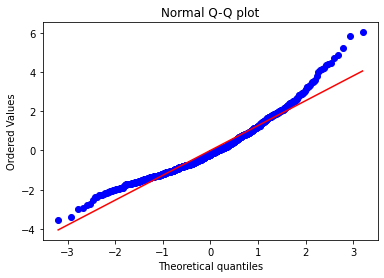

In [29]:
from scipy import stats
import matplotlib.pyplot as plt
stats.probplot(df_log['resid'], dist = 'norm', plot = plt)
plt.title('Normal Q-Q plot')
plt.show()

In [30]:
#Question for Julia, I already logged 4 features and the target, what else can I do to improve normality in the QQ plot. It looks okay

In [34]:
#RMSE
residuals = crypto_model.predict(x) - y
rmse = np.sqrt(sum(residuals**2)/len(residuals))
print(rmse)
#MAE
mae = sum(abs(crypto_model.predict(x) - y)/len(y))
print(mae)

1.2921907304459754
1.0031365557573515


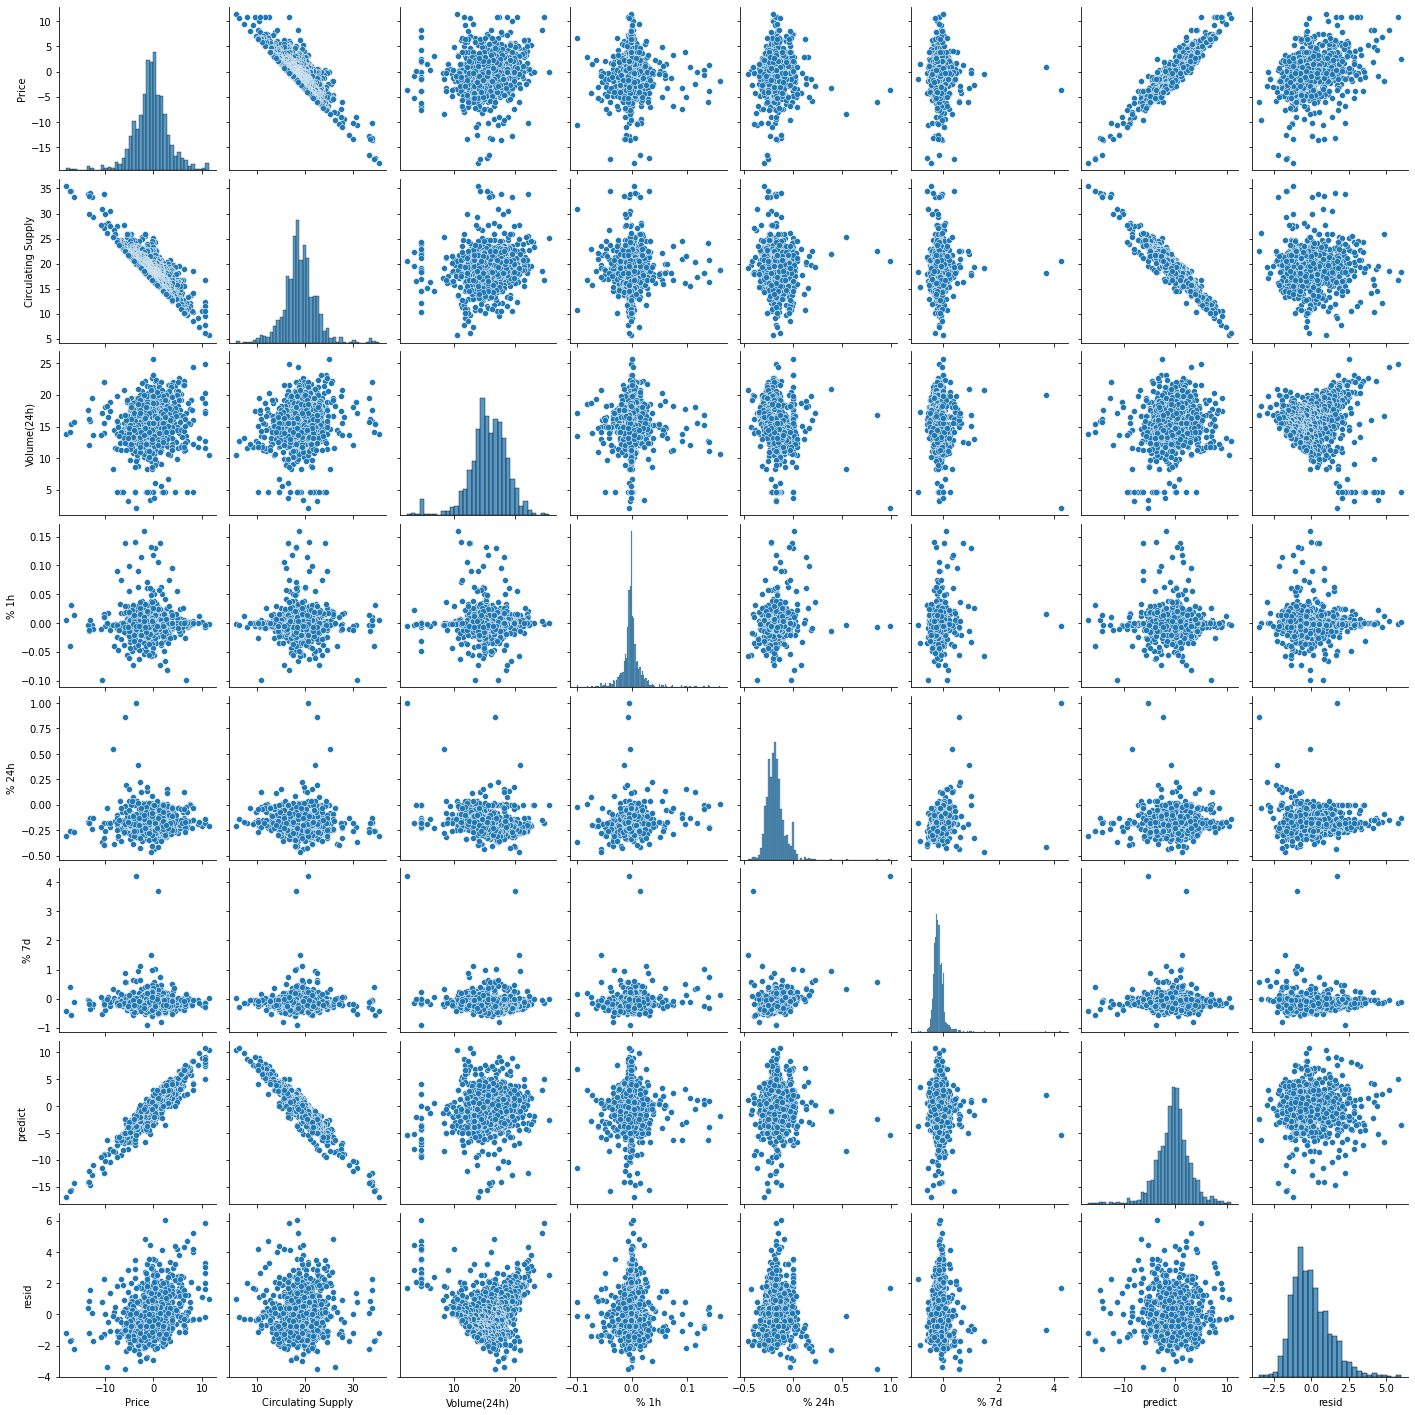

In [35]:
sns.pairplot(df_log)

In [41]:
#Cross Valditation Trial

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df_log.drop(columns=['Price', 'Symbol'])
y = df_log['Price']

#X, X_test, y, y_test = train_test_split(X, y, 
                                       #test_size=.3,     
                                       #random_state=42)


In [56]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
lr = model.fit(X,y)

r_squared_train = lr.score(X,y)
#r_squared_test = lr.score(X_test, y_test)

print(r_squared_train)
#print(r_squared_test)

1.0
